In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_detsys_recomb2/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Detector systematic: recombination 2

In [4]:
# Load input files
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_detsys_recomb2.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV.root'
filename_data = 'NuCCana_data_V22.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

#additional detector variation file
filename_detsys = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_recomb2.root'

tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     8.649e+18  # best with tor875
data_trigger = 1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	88718
Data: Number of Entries:	33178
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.09993583549e+20
Dirt:		1.25019694173e+20

Detsys POT: 1.12144626295e+20  Scale:  0.0771236240716
Scalefactors: 
Data:		1.0
Ext:		0.0976176954382
Overlay:	0.0786318594316
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out4.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	90571
Overlay: Number of Entries:	88714
Data: Number of Entries:	33177
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
fidVol = '((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)))'
MCfidVol = '((MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)))'
numu_signal = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)' # numu CC signal definition
numu_true = '('+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14)' # numu CC signal definition
numu_nomu = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5)' # not an MC muon
numu_lowpur = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5)' #low purity
numu_nc = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==1)' # nutral current
numu_ov = '('+fidVol+' && !'+MCfidVol+')' # out of fiducial
numu_other = '('+fidVol+' && '+MCfidVol+' && MCNu_CCNC==0 && MCNu_PDG!=14)' # e.g anti nu or nue

track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && ('+track_end_uncontained+'==1 || nr_crthit_beam_tres==0) && (abs(crtt0_time-4)<0.8 || crtt0_time==-1)'

cut = fidVol+' && (key_muon==track_key) && '+crt_tom_cut+' && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

print cut

overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))) && (key_muon==track_key) && nr_crthit_top==0 && crthit_vertex_zcut==0 && (((TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1)) || (TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1)) || (TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1)))==1 || nr_crthit_beam_tres==0) && (abs(crtt0_time-4)<0.8 || crtt0_time==-1) && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1


In [9]:
# Load the global variables for access of functions
#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

In [10]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
print numu_signal

(((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))) && ((MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))) && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)


In [12]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
#print dirt_out.GetEntries(cut)
#print dirt_out.GetEntries(cut)*scale_out[dirt_out]

#print overlay_out.GetEntries("!((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)) && (MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)")
print overlay_out.GetEntries('!('+numu_signal+')')

73823


In [13]:
# calculate total flux integrated cross section:

N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !'+numu_signal)*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+' && '+numu_signal)*scale_out[overlay_out]
N_true = overlay_out.GetEntries(numu_true)*scale_out[overlay_out]
#print N_dirt, N_overlay
N_overlay_detsys = detsys_out.GetEntries(cut+'&& !'+numu_signal)*scale_out[detsys_out]
N_signal_detsys = detsys_out.GetEntries(cut+'&& '+numu_signal)*scale_out[detsys_out]
N_true_detsys = detsys_out.GetEntries(numu_true)*scale_out[detsys_out]
 
h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && '+numu_signal,'0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !'+numu_signal,'0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',numu_true,'0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]

h_weight_func2 = ROOT.TH1F("h_weight_func2",'h_weight_func',10000,0,1000)
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && '+numu_signal,'0') # weights for signal definition
detsys_signal = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && !'+numu_signal,'0') # weights for signal definition
detsys_pass_weight = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2',numu_true,'0') # weights for signal definition
detsys_true_weight = h_weight_func2.GetMean()

print 'Weights for CV', overlay_signal, overlay_pass_weight, overlay_true_weight
print 'Weights for detsys', detsys_signal, detsys_pass_weight, detsys_true_weight

N_dirt = N_dirt*dirt_pass_weight

N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight

N_overlay_detsys = N_overlay_detsys*detsys_pass_weight
N_signal_detsys = N_signal_detsys*detsys_signal
N_true_detsys = N_true_detsys*detsys_true_weight

eff = N_signal/(N_true+1e-80)
eff_detsys = N_signal_detsys/(N_true_detsys+1e-80)

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Total integrated cross section:', sigma_tot
sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC

sigma_tot_detsys = (N_data- (N_ext+N_dirt+N_overlay_detsys))/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay_detsys
print 'Number of overlay signal:', N_signal_detsys
print 'Total integrated cross section:', sigma_tot_detsys
sigma_tot_MC_detsys = (N_signal_detsys)/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC_detsys

Weights for CV 1.17376569314 1.09900522289 1.209350713
Weights for detsys 1.17413660466 1.10225789255 1.2041584907
Number of data: 1478
Number of ext: 173.369027098
Number of dirt: 36.4397439445
Number of overlay: 221.572737251
Number of overlay signal: 1052.25961585
Total integrated cross section: 8.05664392637e-39
Total integrated cross section for MC: 8.10006808612e-39
Number of data: 1478
Number of ext: 173.369027098
Number of dirt: 36.4397439445
Number of overlay: 220.176219438
Number of overlay signal: 1039.73724016
Total integrated cross section: 8.1582670869e-39
Total integrated cross section for MC: 8.0938288368e-39


In [14]:
print eff,N_signal,(N_true+0.000001)
print eff_detsys,N_signal_detsys,(N_true_detsys+0.000001)

print 'Scaling: ', scale_out[detsys_out],scale_out[overlay_out],scale_out[dirt_out],scale_out[ext_out],scale_out[data_out]

print 'xsec percent diff MC: ', (sigma_tot_MC-sigma_tot_MC_detsys)/sigma_tot_MC
print 'xsec percent diff: ', (sigma_tot-sigma_tot_detsys)/sigma_tot


0.498671777927 1052.25961585 2110.12466101
0.493117187305 1039.73724016 2108.49929271
Scaling:  0.0771236240716 0.0786318594316 0.0691811002835 0.0976176954382 1.0
xsec percent diff MC:  0.000770271219674
xsec percent diff:  -0.0126135846953


In [15]:
#NuCC.printEff_out(cut)

In [16]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

782

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_eff_trueMom.root has been created


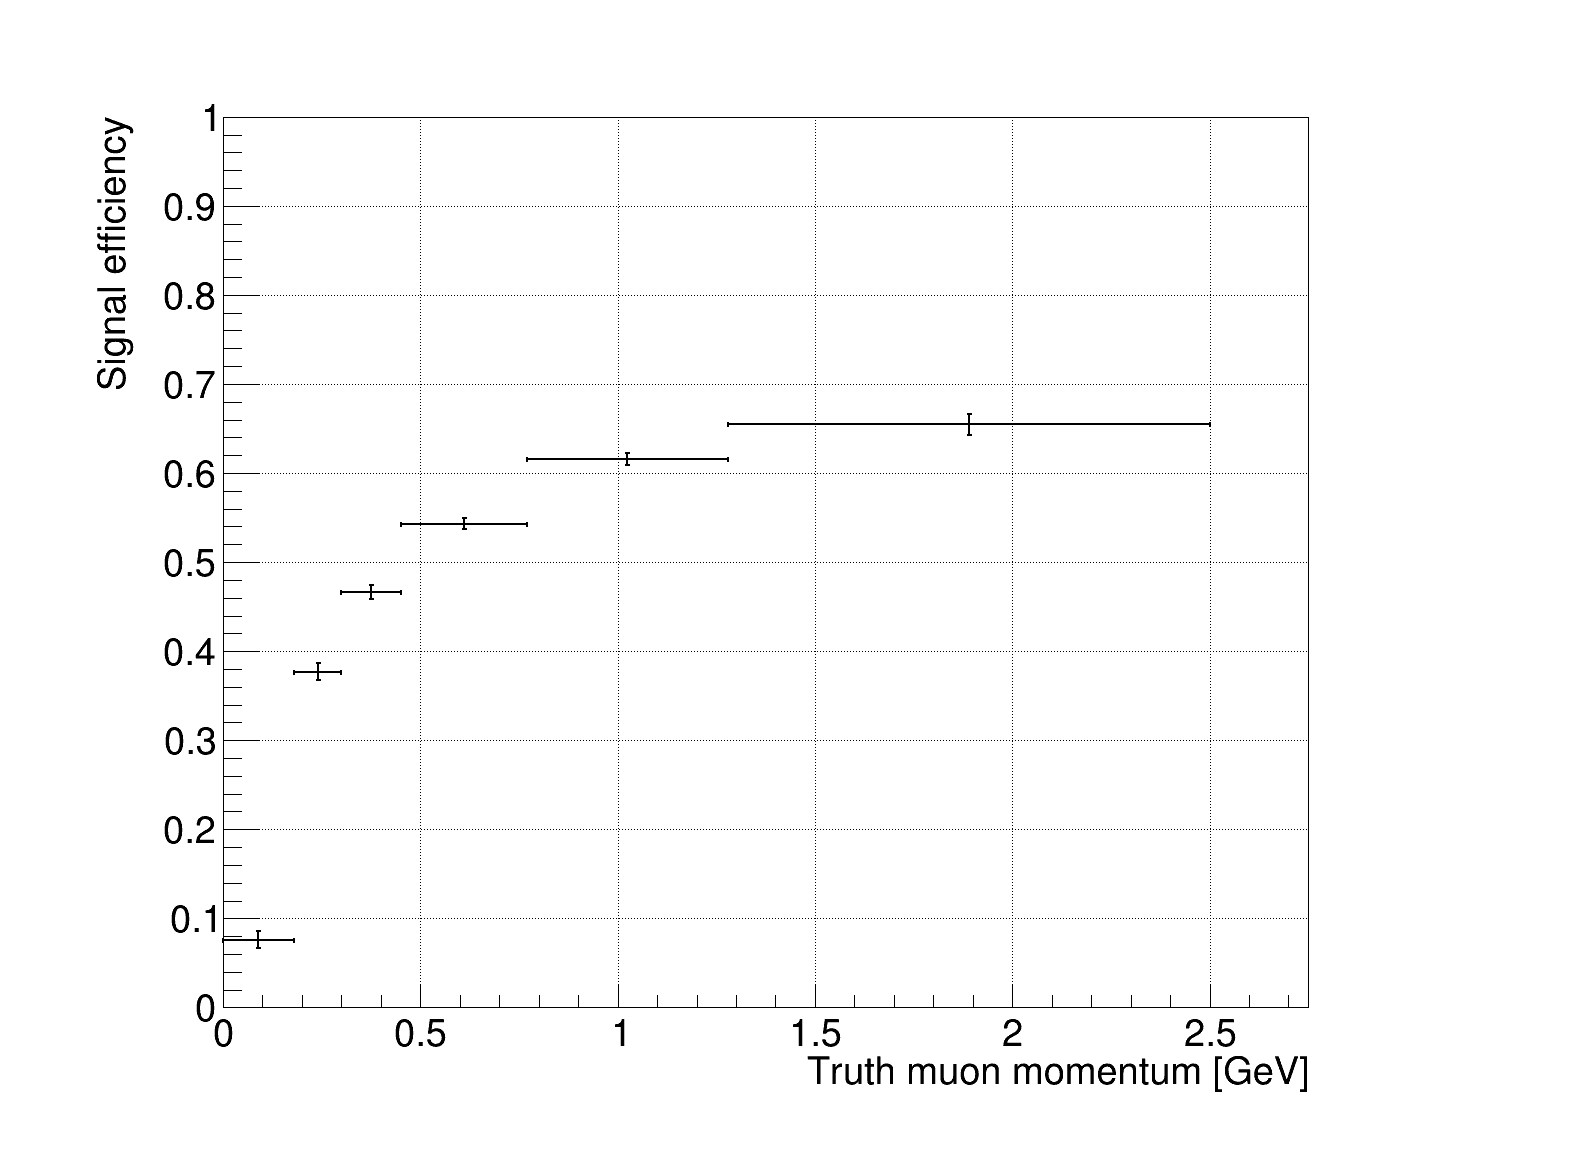

In [17]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = numu_true
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(outputdir_root + "h_eff_trueMom.root")

eff.Write("h_eff_true")

61331

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h2_true_MCS.png has been created


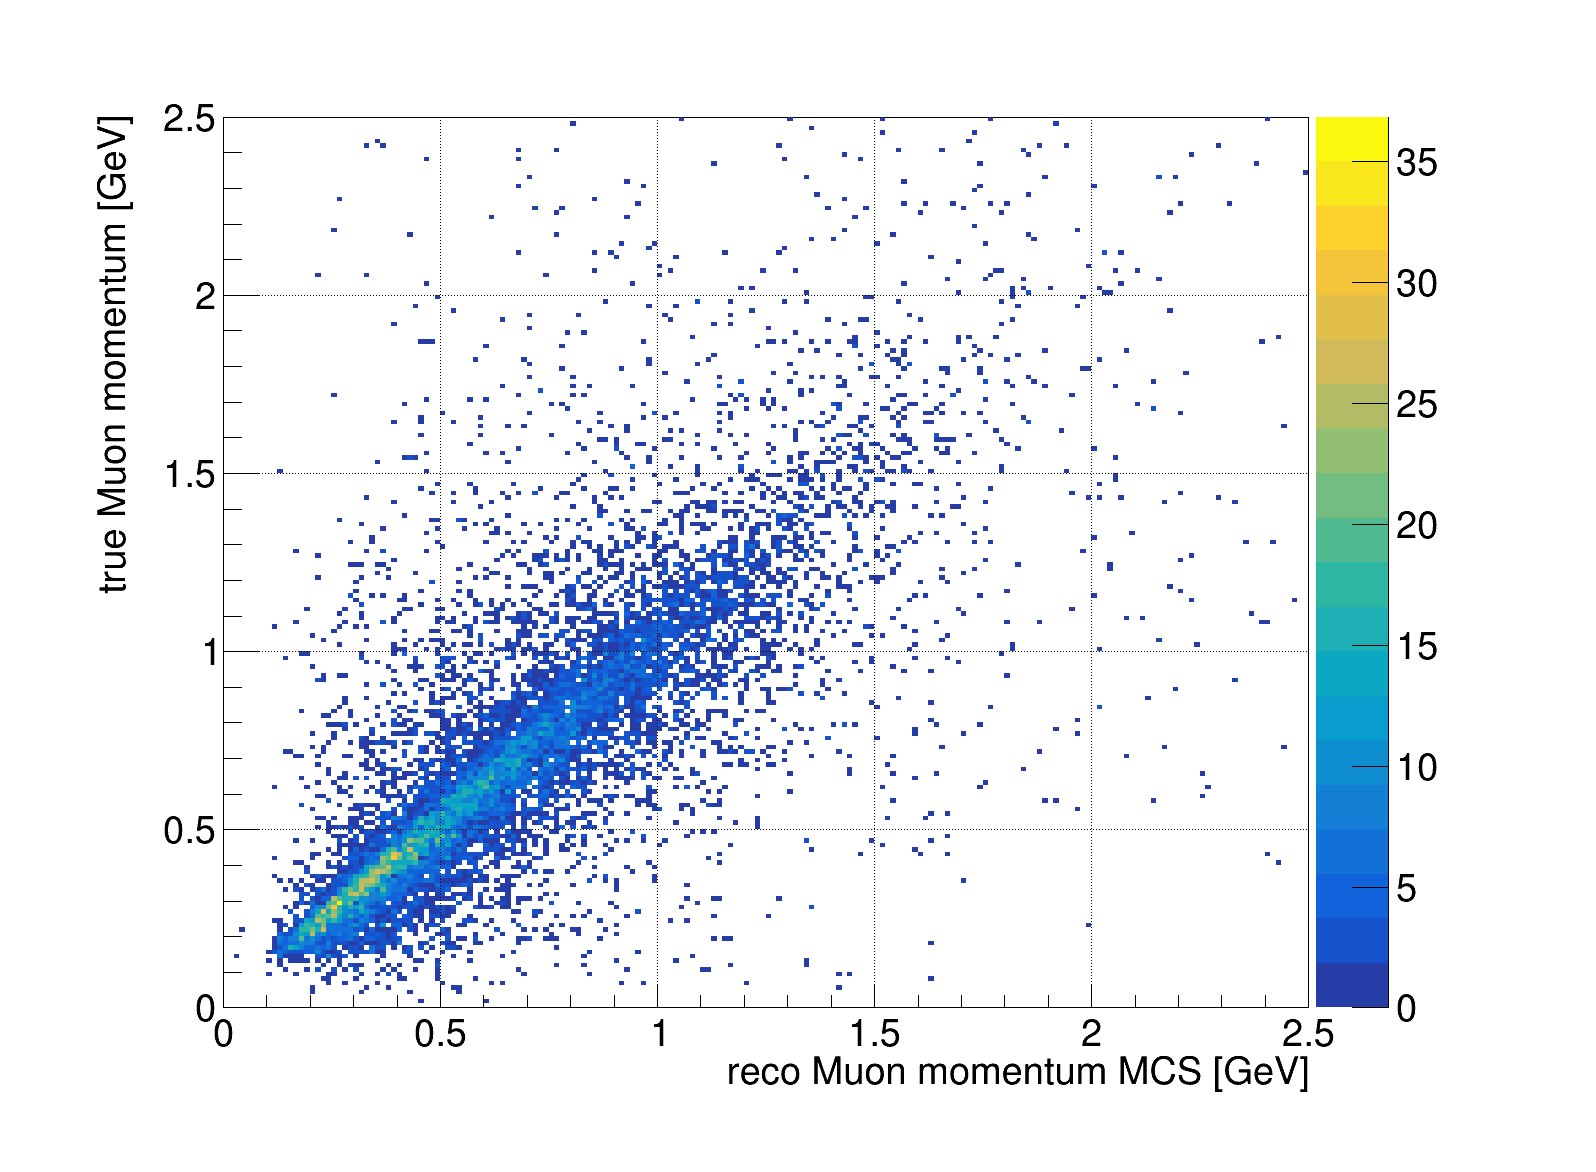

In [18]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&'+numu_true+')','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS.root")
c1.SaveAs(outputdir_png + "h2_true_MCS.png")
h_migration.Write("h2_true_MCS_fine")

1173

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h2_true_MCS_bin.png has been created


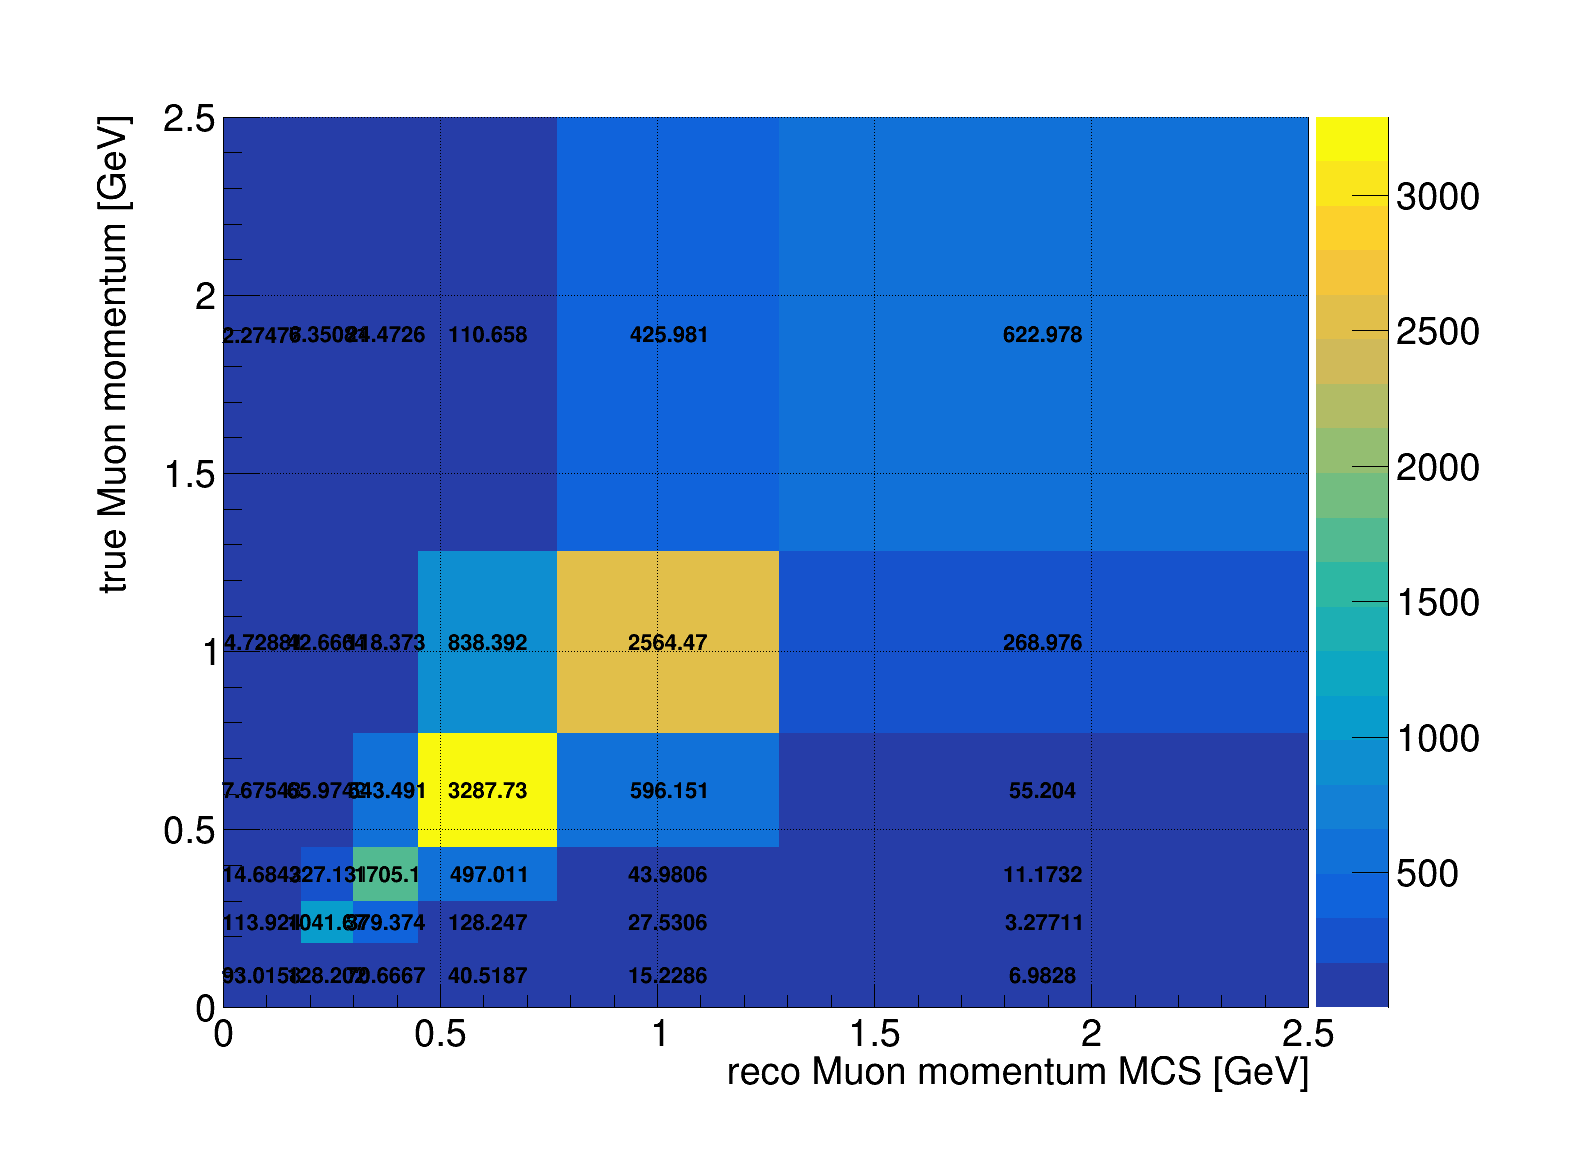

In [19]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&'+numu_true+')','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(outputdir_png + "h2_true_MCS_bin.png")
h_migration.Write("h2_true_MCS_bin")

[[0.2623009  0.0672507  0.00564977 0.00168179 0.0012308  0.00188334]
 [0.3615255  0.61490876 0.12586409 0.01445582 0.01110506 0.00525801]
 [0.19927732 0.22394861 0.65603995 0.11908596 0.03080958 0.02026154]
 [0.11426112 0.07570583 0.19122572 0.72038508 0.2182137  0.09161649]
 [0.04294395 0.01625159 0.01692159 0.13062454 0.66747025 0.35268047]
 [0.01969121 0.00193451 0.00429889 0.01209593 0.07000798 0.51577972]
 [0.         0.         0.         0.00167088 0.00116263 0.01252043]]


648

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_mitigation_matrix.root has been created


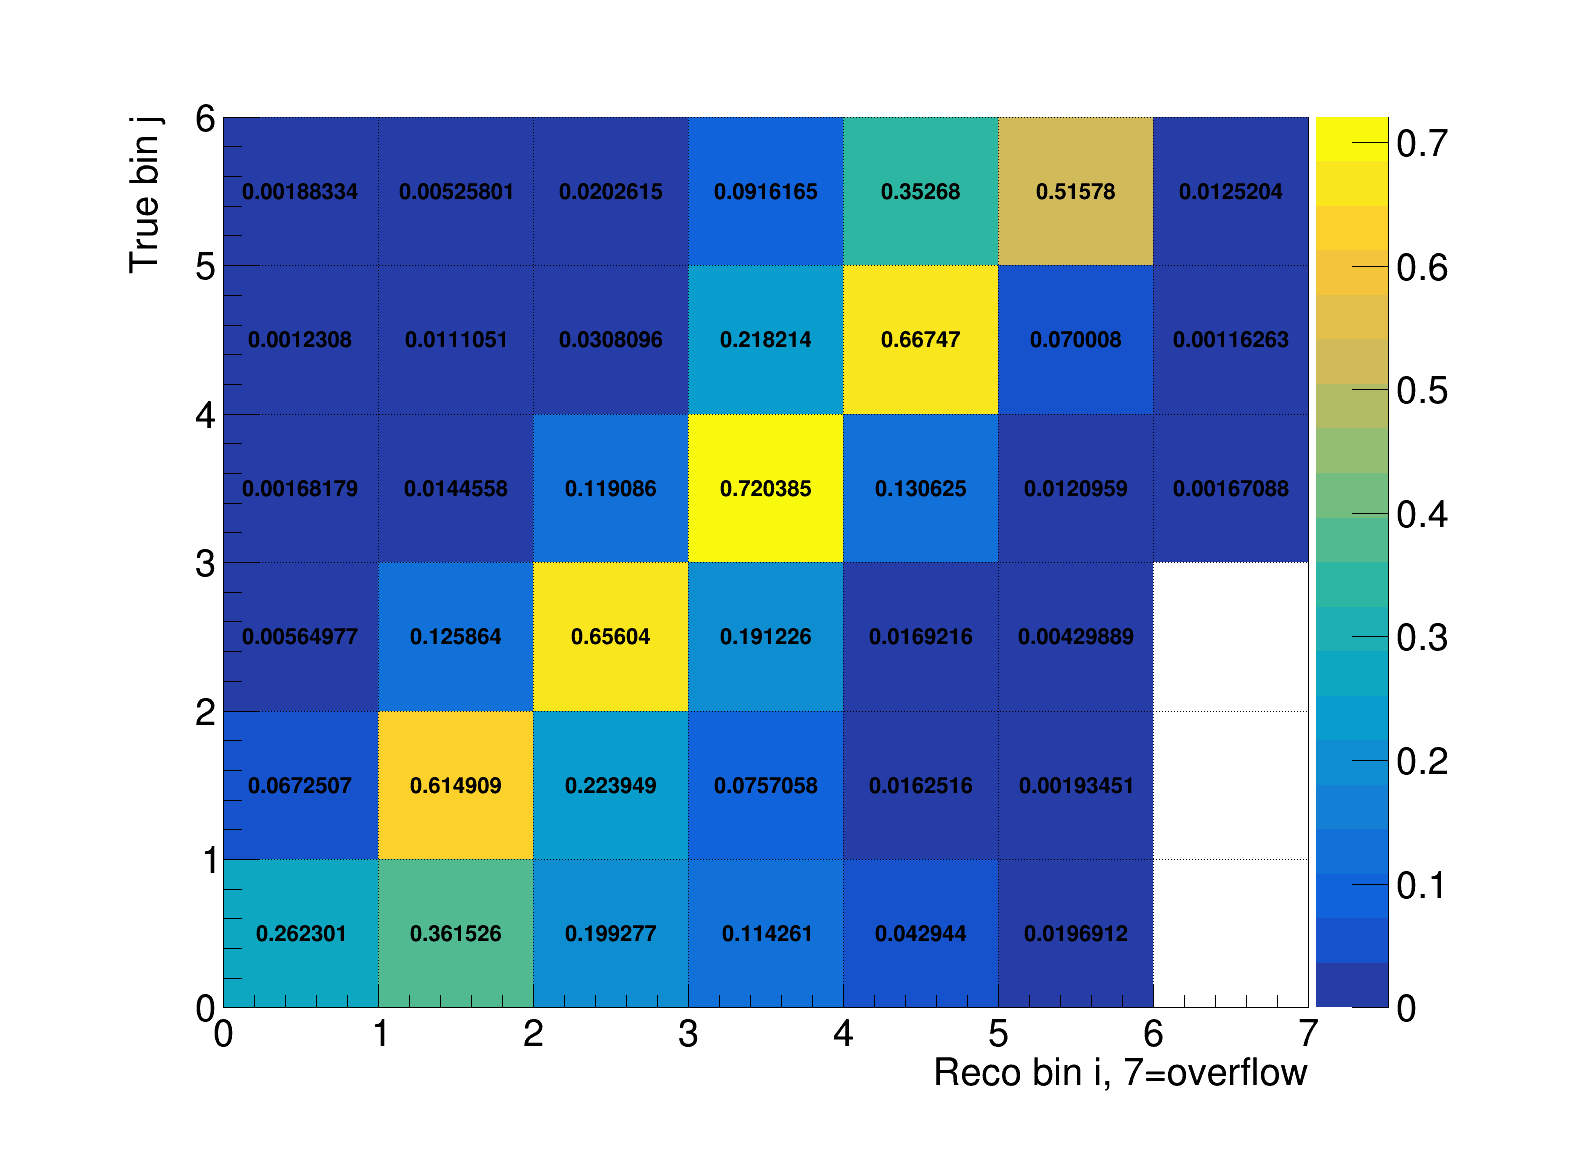

In [20]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((7,6))
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,6,0,6)
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_matrix.root")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [21]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = numu_true
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

485

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [22]:
# e tilde
N_sel = np.zeros((6))
N_gen = np.zeros((6))
Err_sel = np.zeros((6))
Err_gen = np.zeros((6))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((6))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)


170.35960388183594 2240.8349609375 0.07602505621858133
1373.8455810546875 3642.995849609375 0.37711972172628194
2393.238525390625 5132.20947265625 0.46631738983794235
4398.740234375 8102.58154296875 0.5428813287528262
3748.896484375 6088.54833984375 0.6157291155663565
1177.166015625 1798.5958251953125 0.6544916868675427
[0.18597891 0.33904324 0.44254848 0.52872265 0.59379989 0.61574696
 0.61310151]
[0.14207952 0.33564772 0.49688477 0.63130958 0.72000396 0.72354708
 0.79317706]


In [23]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.009481336537070412
0.009573187602458472
0.007780308263607804
0.006097191294091309
0.006791049376662345
0.012098338283971206
[0.00321612 0.01052081 0.01031796 0.01027852 0.01029051 0.00702792
 0.00016956]


406

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_eff_tilde_xsecMom.root has been created


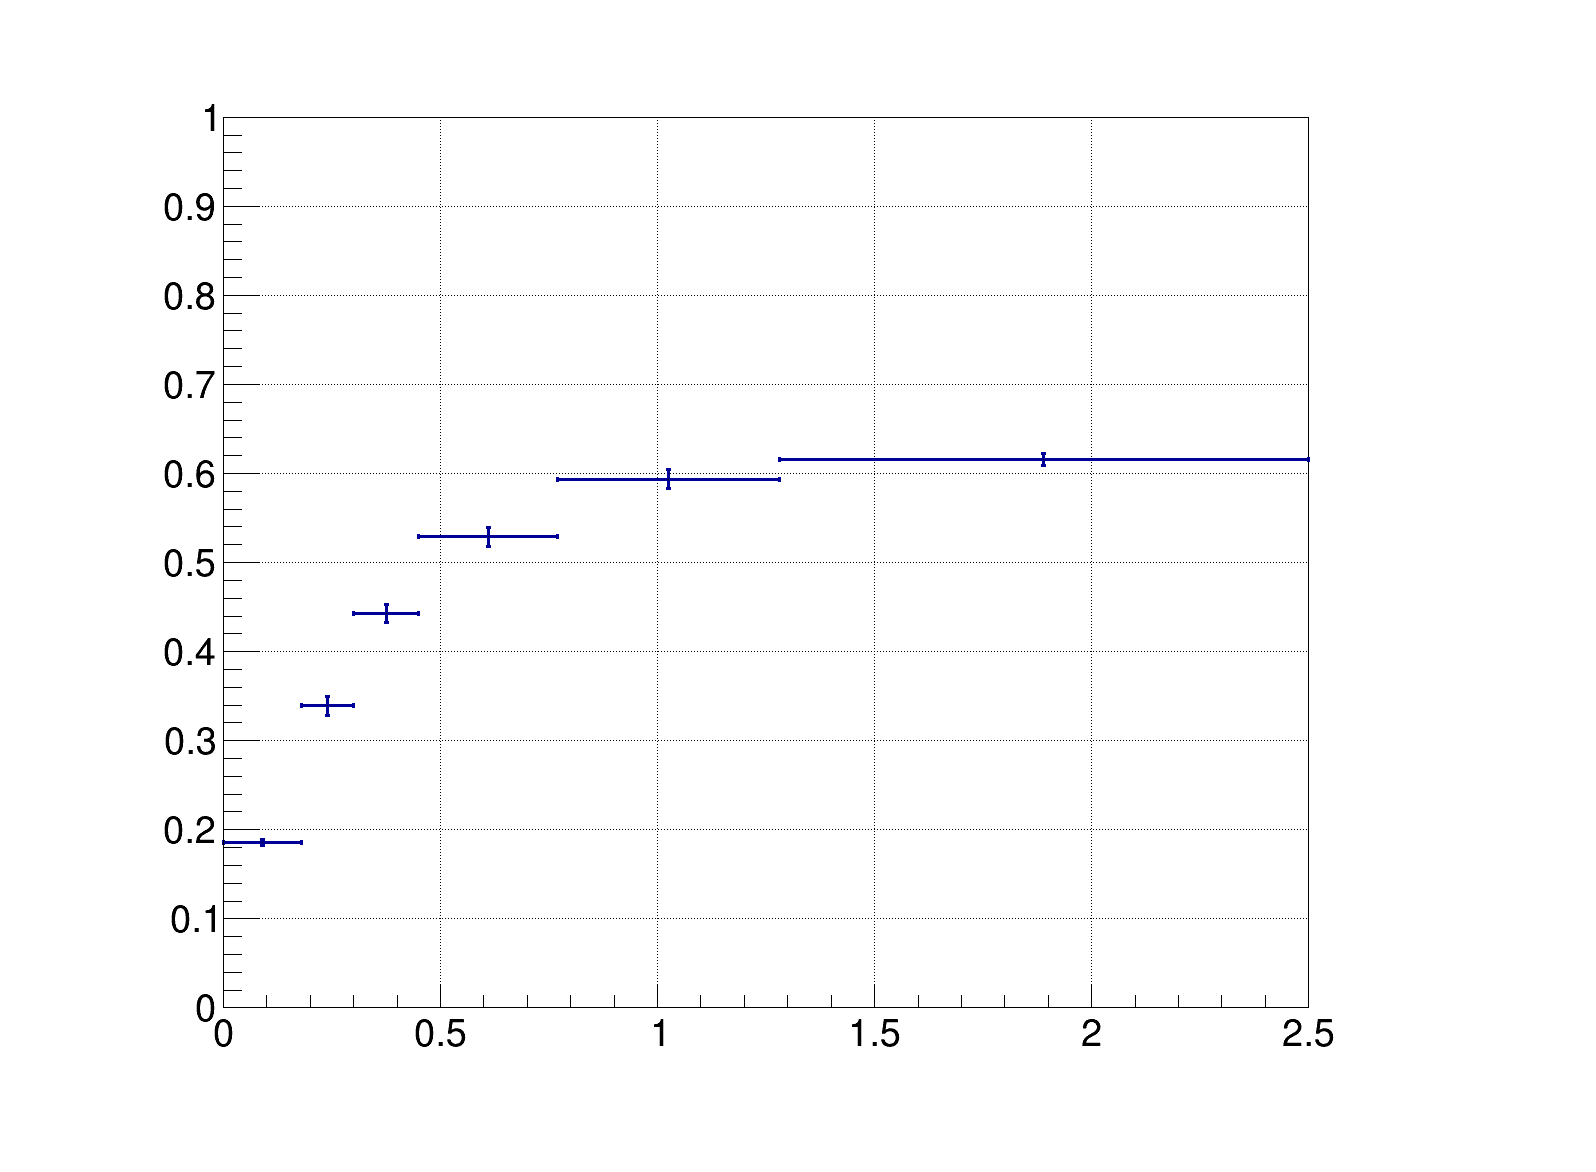

In [24]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecMom.root")

h_eff_tilde.Write("h_eff_tilde")

In [25]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+numu_signal+')','')


2590L

In [26]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

438

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [27]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

219.262946129
1045.37195015


In [28]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [29]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+numu_signal+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [30]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

421

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_xsec_corr.root has been created


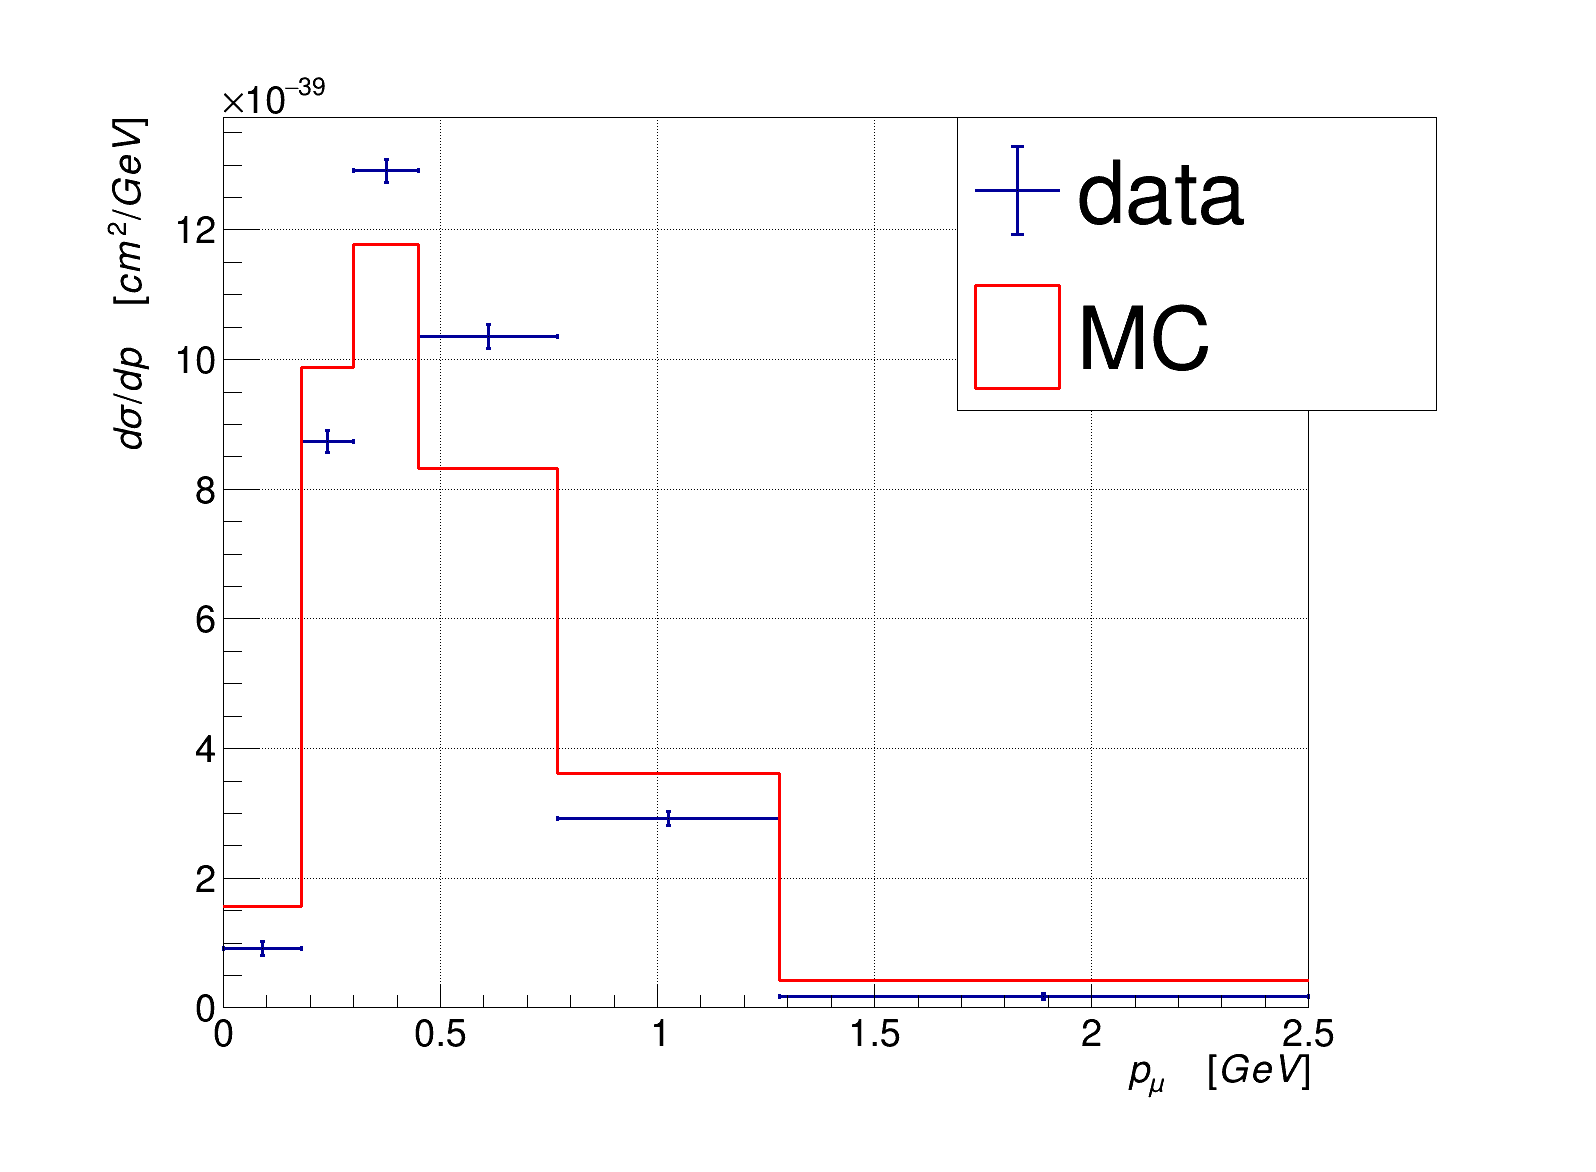

In [31]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr.png")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

# Now in bins of Theta

In [32]:
from array import array
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

851

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_eff_trueTheta.root has been created


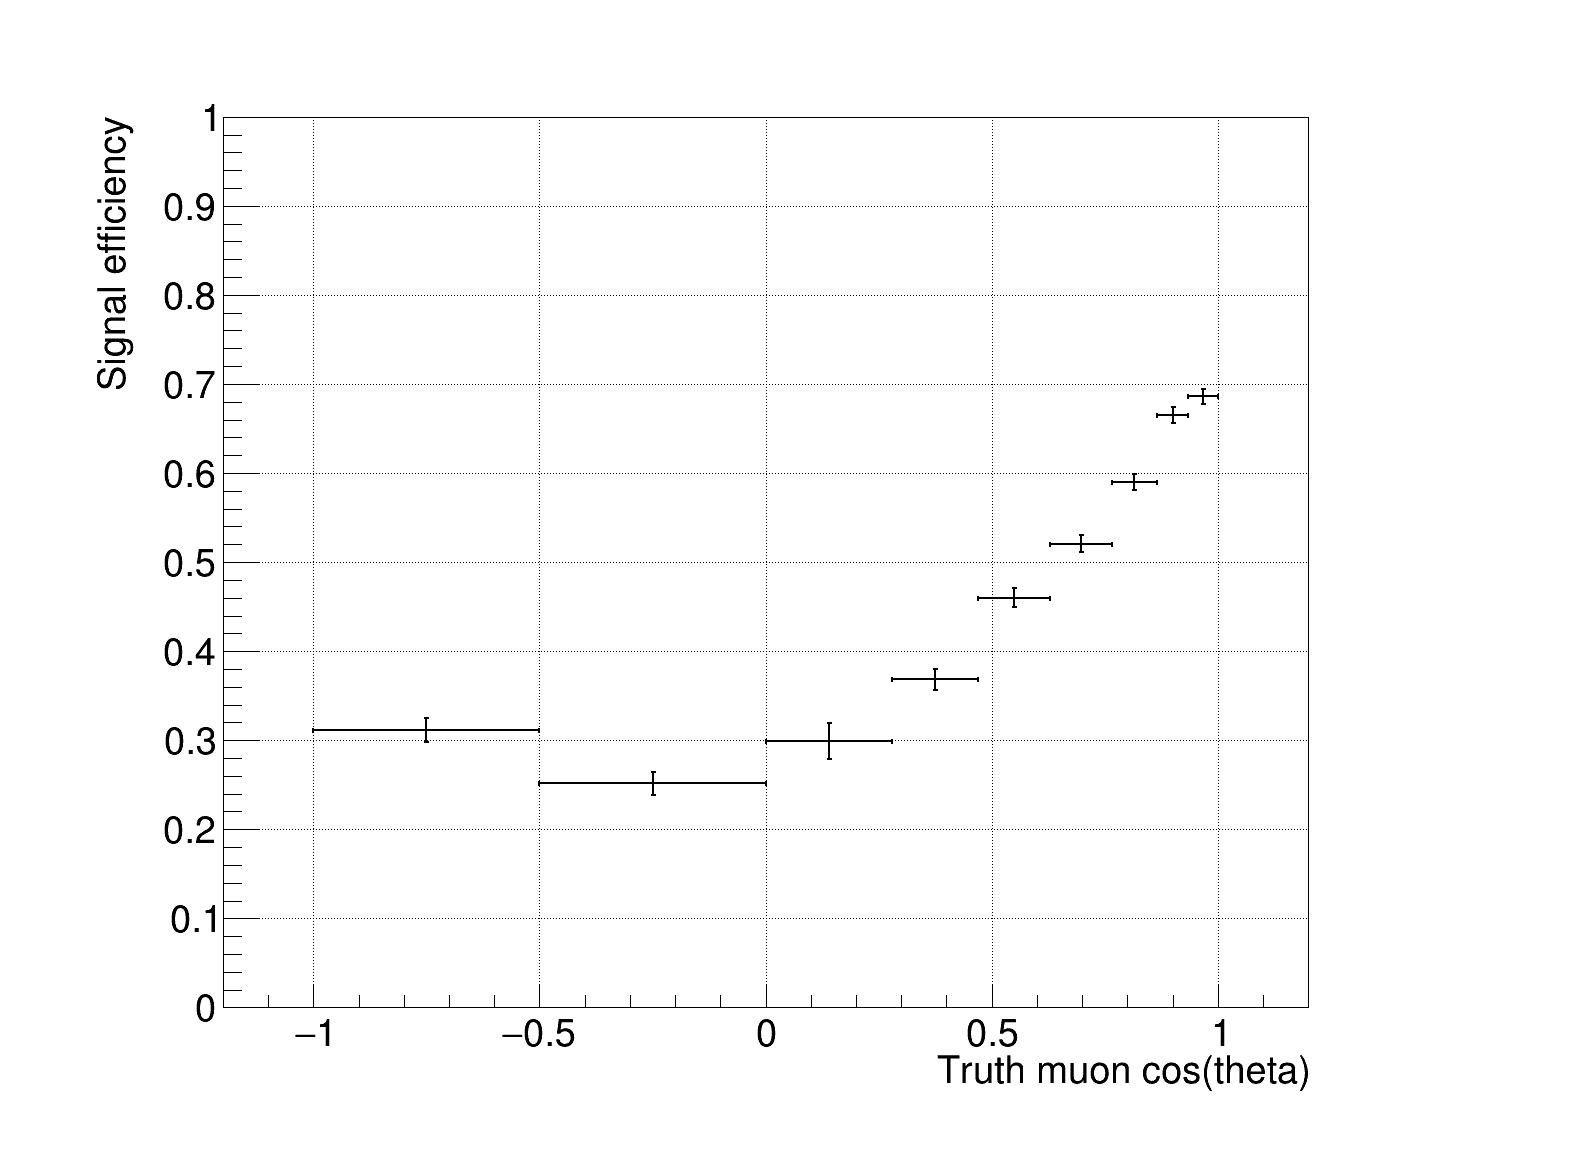

In [33]:
# calculate true theta
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = numu_true
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon cos(theta)")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(outputdir_root + "h_eff_trueTheta.root")

eff.Write("h_eff_true_theta")

36150

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h2_true_Theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h2_true_Theta.png has been created


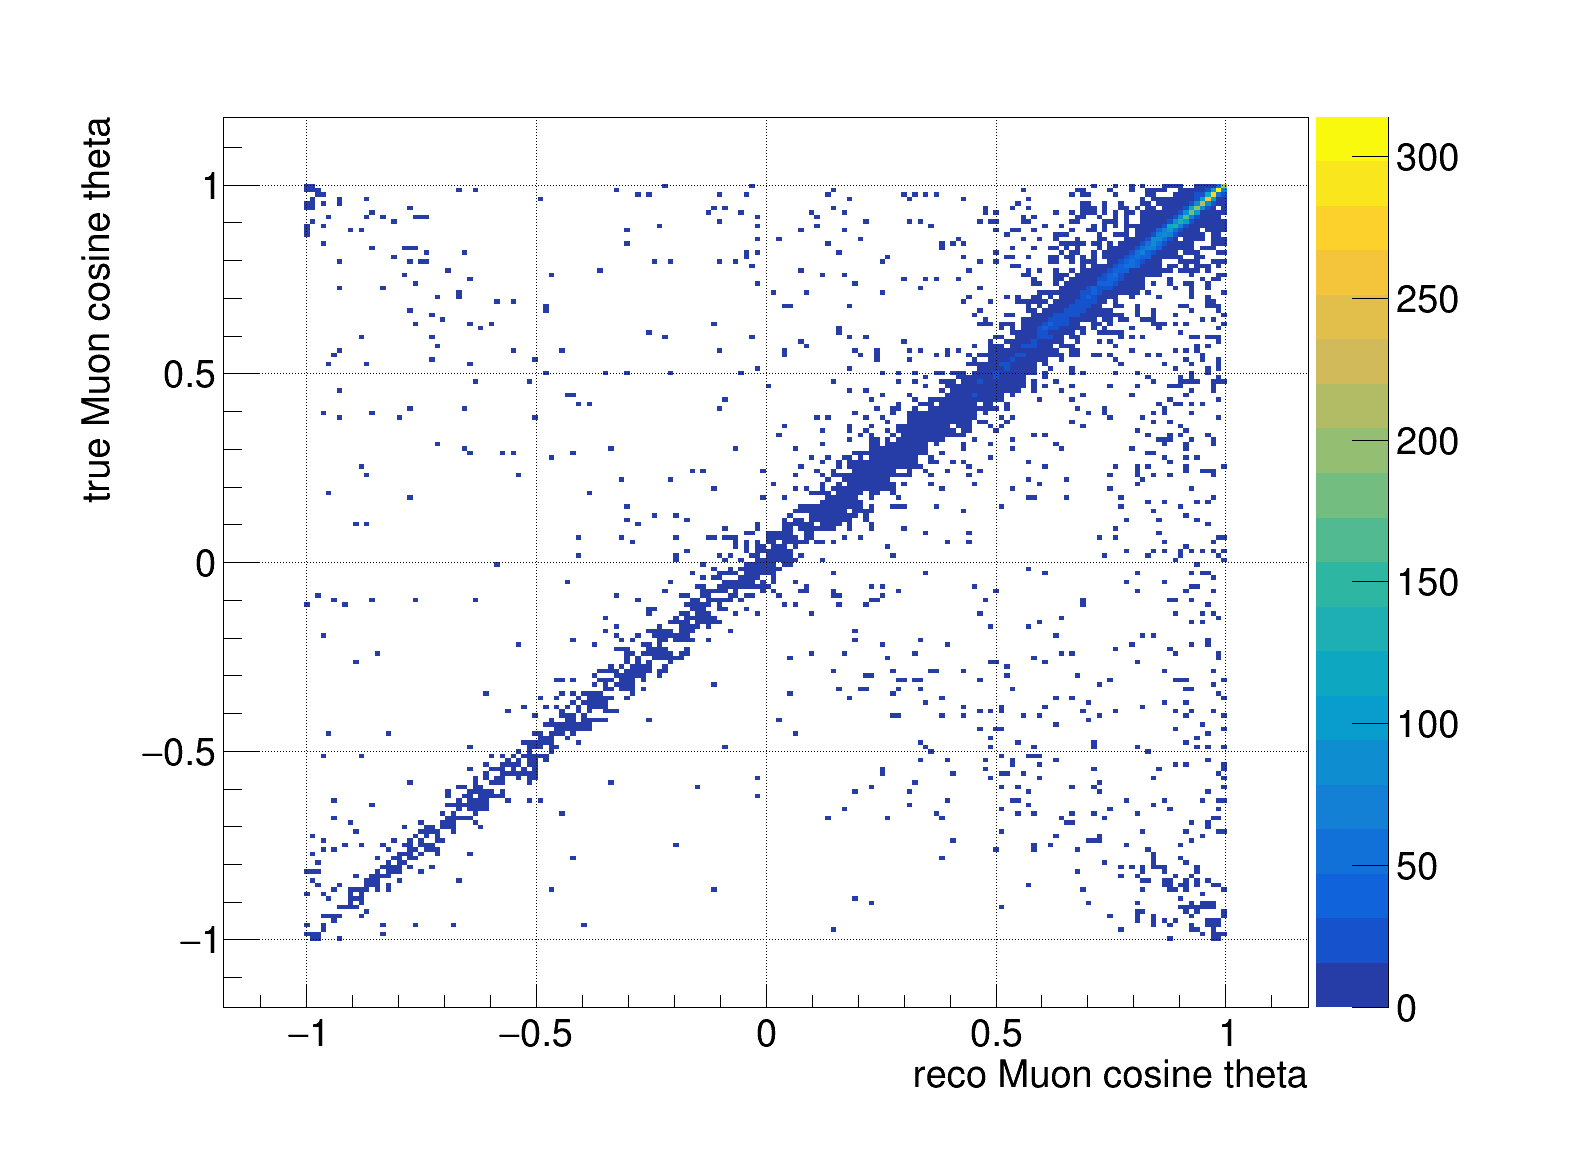

In [34]:
# plot fine binned reco true
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,-1)
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+numu_true+')','')
h_migration.SetXTitle("reco Muon cosine theta")
h_migration.SetYTitle("true Muon cosine theta")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta.root")
c1.SaveAs(outputdir_png + "h2_true_Theta.png")
h_migration.Write("h2_true_theta_fine")

1558

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h2_true_Theta_bin.png has been created


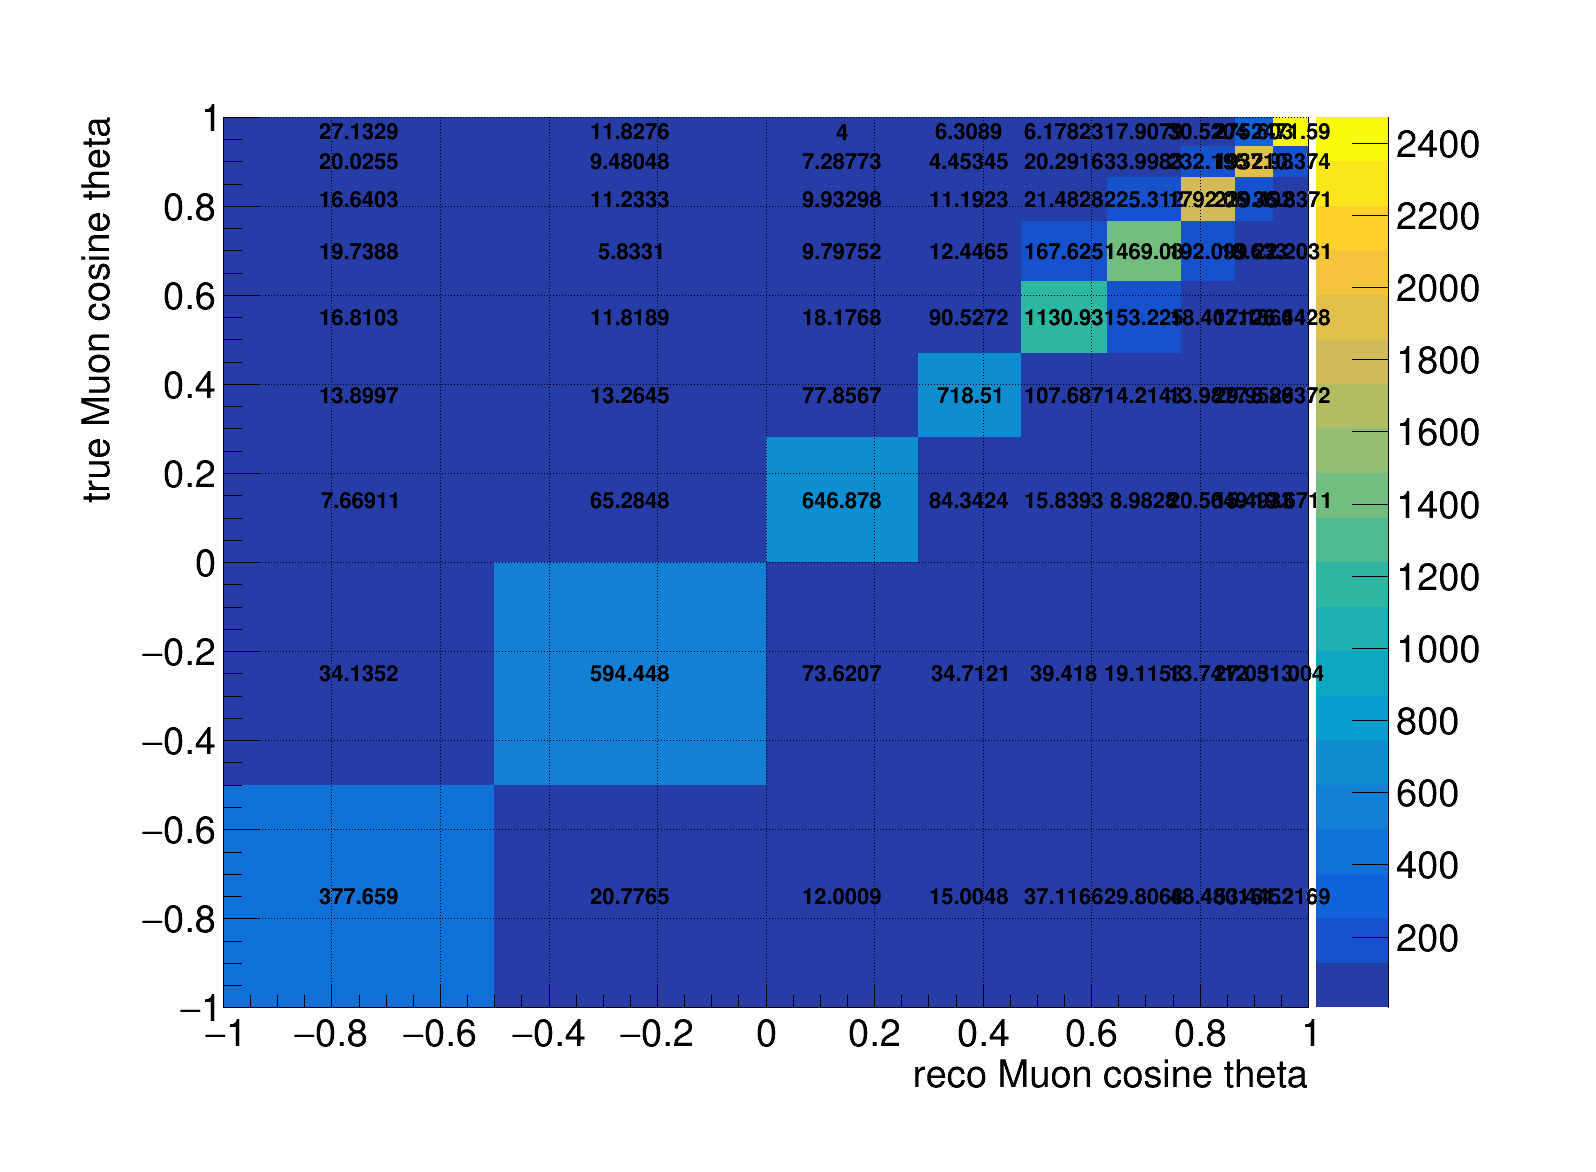

In [35]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+numu_true+')','')
h_migration.SetXTitle("reco Muon cosine theta")
h_migration.SetYTitle("true Muon cosine theta")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(outputdir_png + "h2_true_Theta_bin.png")
h_migration.Write("h2_true_Theta_bin")

[[0.57613271 0.03936052 0.00866835 0.01393252 0.01133138 0.01029425
  0.00706841 0.0080876  0.00951676]
 [0.03169536 0.68544342 0.073791   0.01329586 0.00796677 0.00304211
  0.00477165 0.00382882 0.00414848]
 [0.01830782 0.08489024 0.73116208 0.07804068 0.01225247 0.00510965
  0.00421929 0.00294325 0.00140298]
 [0.0228904  0.04002572 0.09533174 0.7202078  0.06102186 0.00649113
  0.00475423 0.00179859 0.00221282]
 [0.05662275 0.04545192 0.01790309 0.10794151 0.76232916 0.08742036
  0.00912537 0.00819503 0.00216699]
 [0.04547142 0.0220414  0.01015321 0.01424794 0.10328461 0.76616088
  0.09570718 0.01373069 0.00628114]
 [0.07395824 0.01584465 0.02324438 0.01402072 0.01240435 0.10018459
  0.76122361 0.093775   0.01070492]
 [0.08153263 0.03119218 0.01751201 0.03002973 0.01158502 0.00971759
  0.09748274 0.78267844 0.09666678]
 [0.09338868 0.03574995 0.02223414 0.00828325 0.01782439 0.01157944
  0.01564752 0.08496258 0.86689912]]


844

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_mitigation_theta_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_mitigation_theta_matrix.root has been created


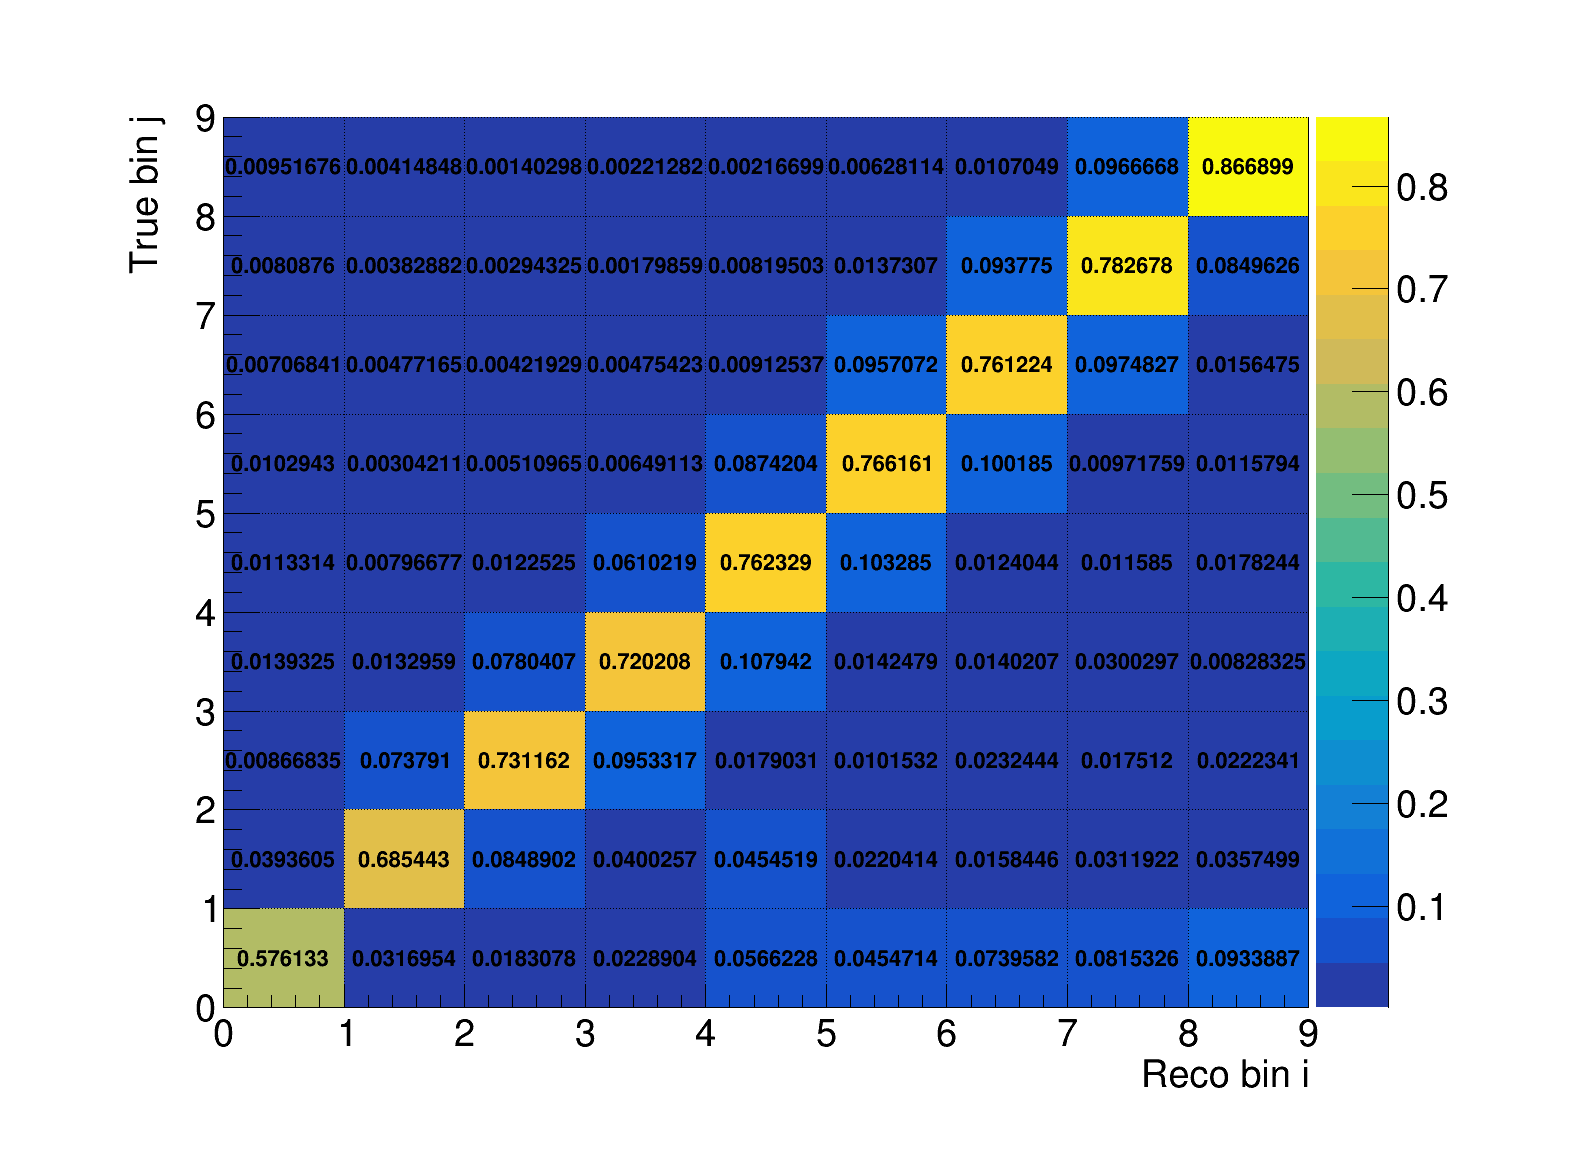

In [36]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_theta_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_theta_matrix.root")

h_mitigation_matrix.Write("h_mitigation_theta_matrix")

In [37]:
# Nselected and N generated
title = 'cosine theta efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = numu_true
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

525

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [38]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
Err_sel = np.zeros((9))
Err_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((9))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((9))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_theta_xsec',eff_tilde)


492.90350341796875 1584.802734375 0.31101883706198646
705.7437744140625 2804.513427734375 0.25164571060164165
764.427001953125 2555.121826171875 0.299174385394532
900.0484008789062 2444.50439453125 0.36819258860506016
1364.129150390625 2965.623779296875 0.45998051401990336
1824.7000732421875 3505.710693359375 0.5204936267840329
2264.803955078125 3840.302490234375 0.5897462402603352
2387.009765625 3590.34912109375 0.6648405726342932
2777.673828125 4048.309814453125 0.6861317328550923
[0.34316237 0.27039754 0.30861276 0.36690256 0.44722688 0.51373874
 0.57145718 0.62670624 0.64922243]
[0.48767193 0.27465388 0.21544537 0.4451481  0.60636103 0.68862427
 0.71486474 0.73292326 0.7299159 ]


In [39]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.013493821558977928
0.012636319877359057
0.020484735390890168
0.011728198843287985
0.010666525959003918
0.009548409681306463
0.008770591275428568
0.008883897616072922
0.008488943916208256
[0.00904637 0.01098181 0.01746722 0.01200357 0.01210847 0.01069921
 0.01052805 0.01105044 0.01081631]


460

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_eff_tilde_xsecTheta.root has been created


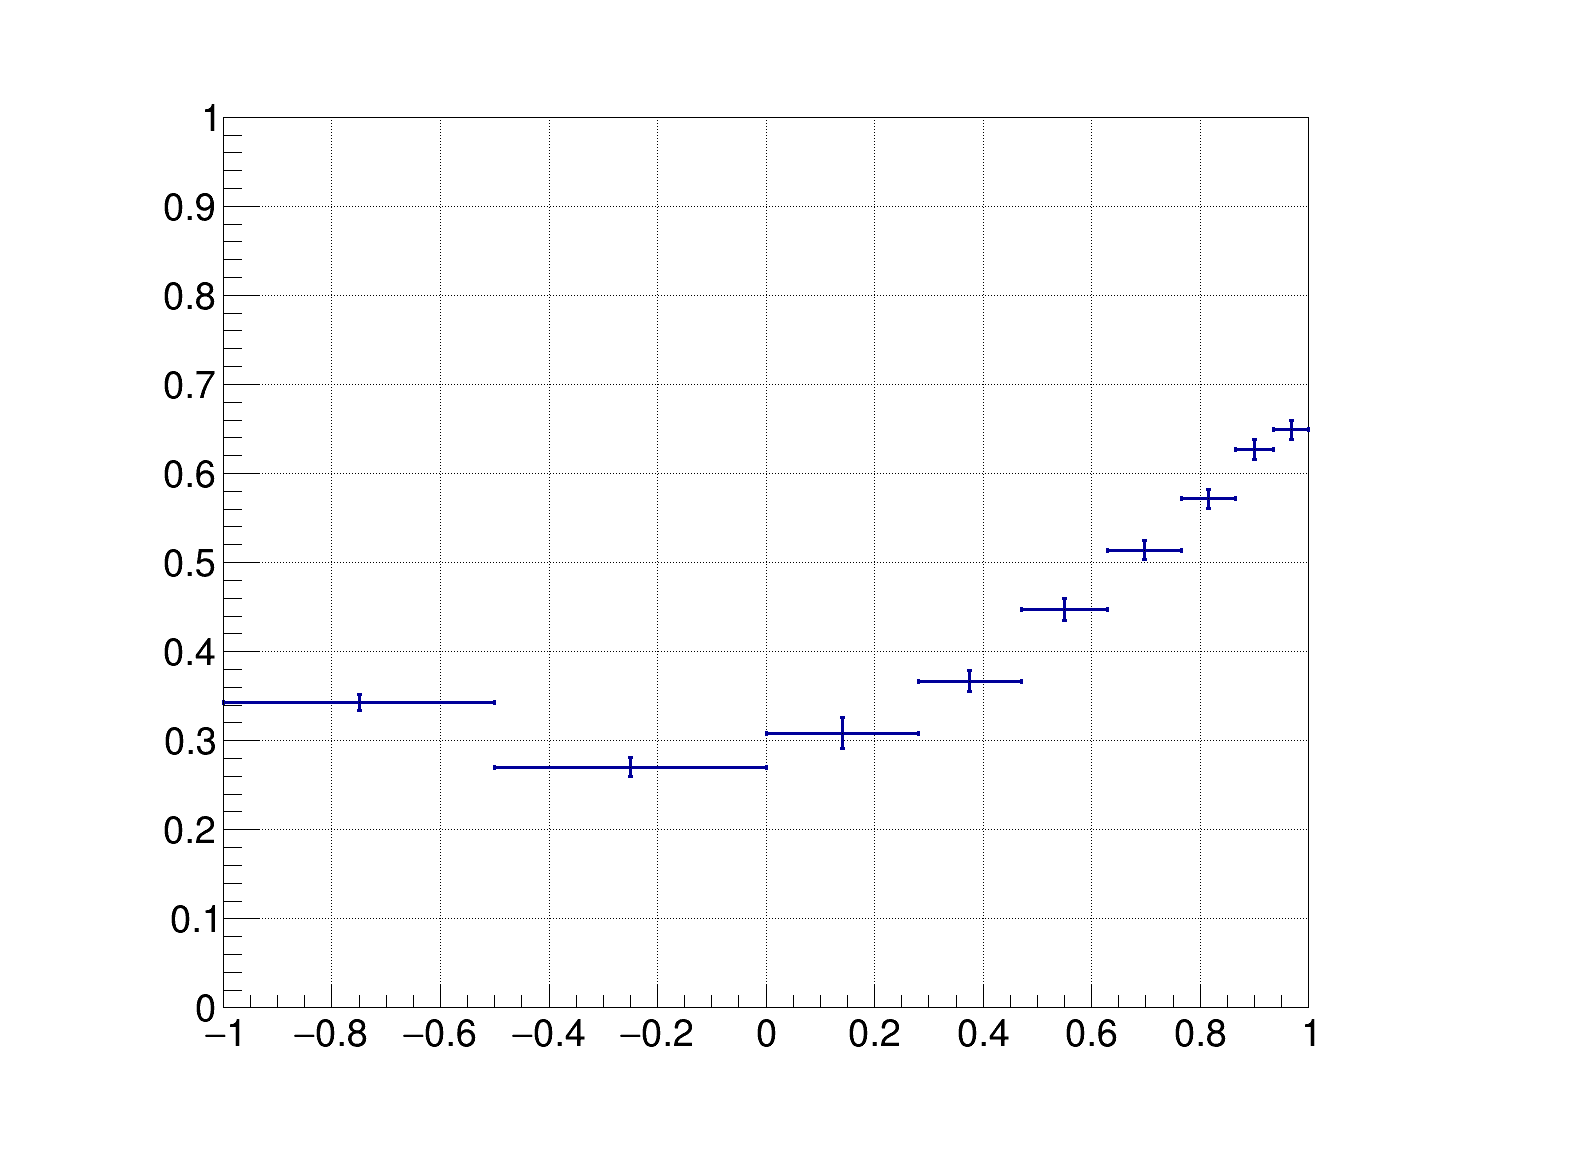

In [40]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.root")

h_eff_tilde.Write("h_eff_theta_tilde")

In [41]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+numu_signal+')','')


2590L

Warning in <TFile::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ext (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dirt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_overlay (Potential memory leak).


In [42]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data_theta")
h_ext.Write("h_ext_theta")
h_dirt.Write("h_dirt_theta")
h_overlay.Write("h_overlay_theta")

476

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [43]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

220.176198959
1048.01504517


In [44]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [45]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+numu_signal+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

Warning in <TFile::Append>: Replacing existing TH1: h_overlay_sig (Potential memory leak).


In [46]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

480

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_recomb2//root/h_xsec_corr_theta.root has been created


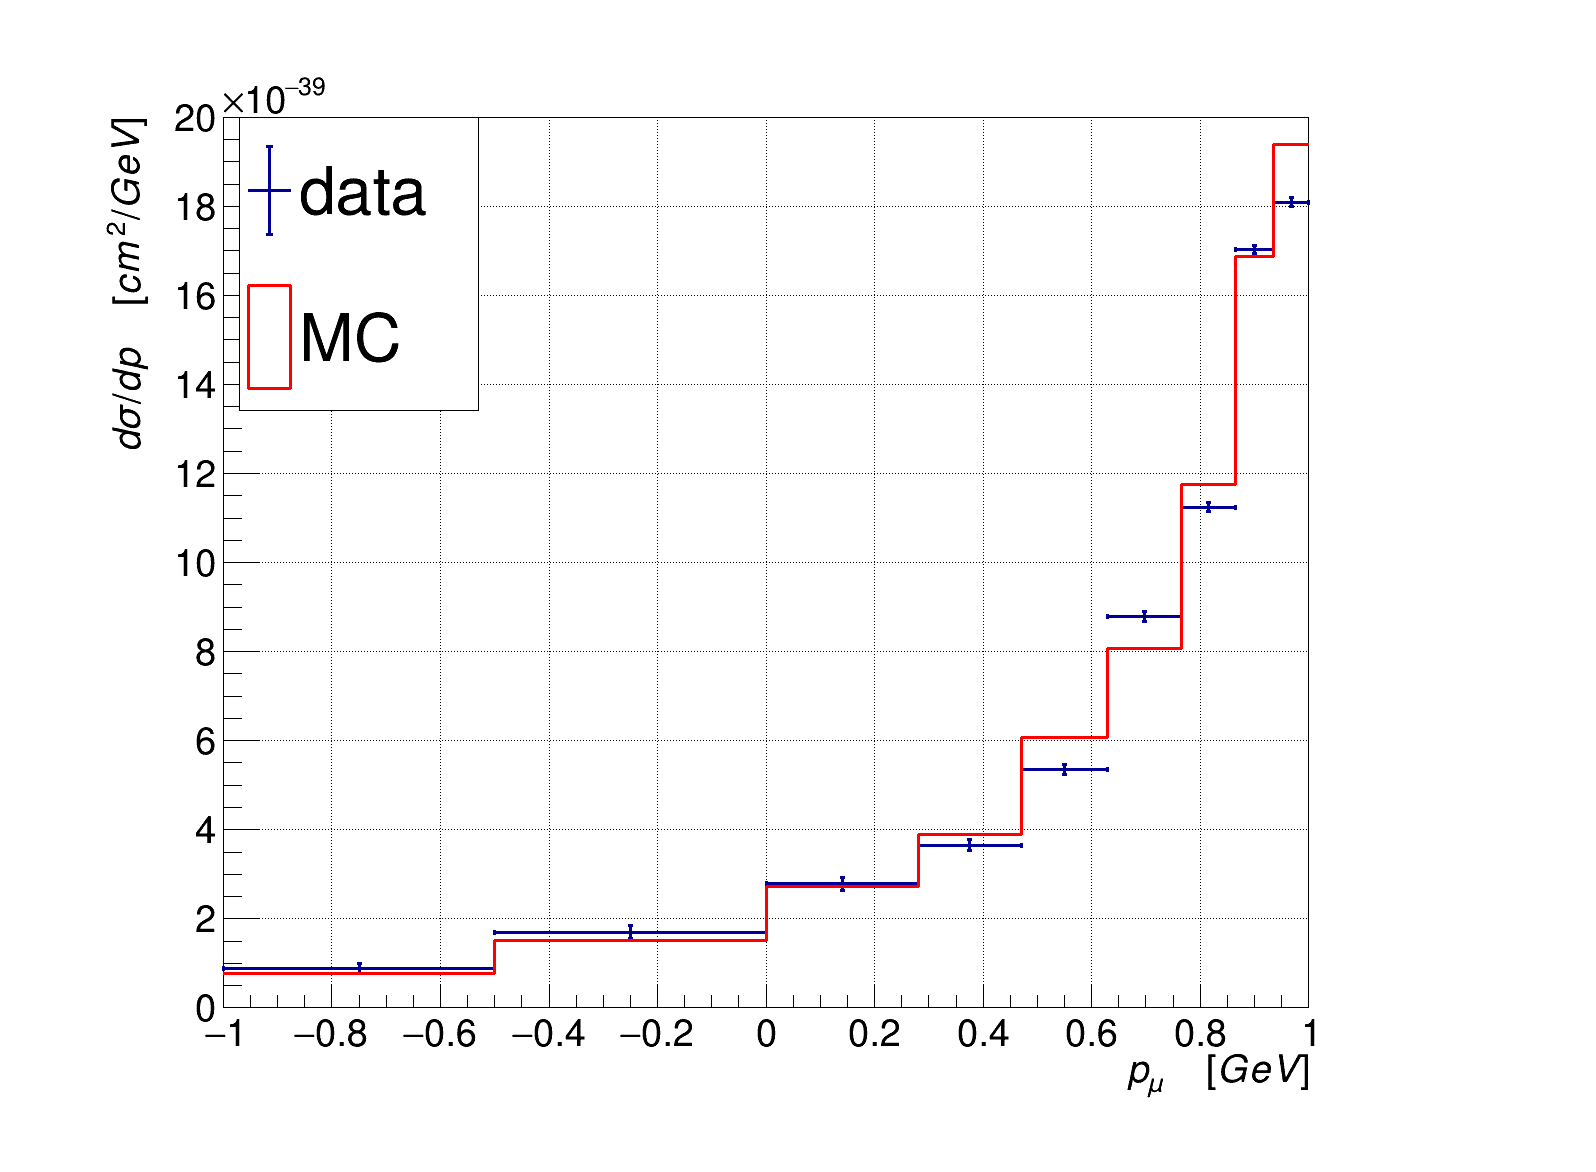

In [47]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9) # rigth
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # left
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(20e-39)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [48]:
RootFile.Close()